In [5]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import datetime

In [6]:
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)




TF version: 2.2.0
TF Hub version: 0.9.0


In [7]:
DATA_PATH=""
MODELS_PATH=""
LOGS_PATH=""
OUTPUT_PATH=""

In [8]:
labels_csv = pd.read_csv(DATA_PATH+ "train.csv")
display(labels_csv.describe())
display(labels_csv.head())

,Filename,Labels
count,14399,14399
unique,14399,120
top,11897_train.jpg,Maltese_dog
freq,1,182


,Filename,Labels
0,1_train.jpg,chow
1,2_train.jpg,malamute
2,3_train.jpg,beagle
3,4_train.jpg,soft
4,5_train.jpg,Eskimo_dog


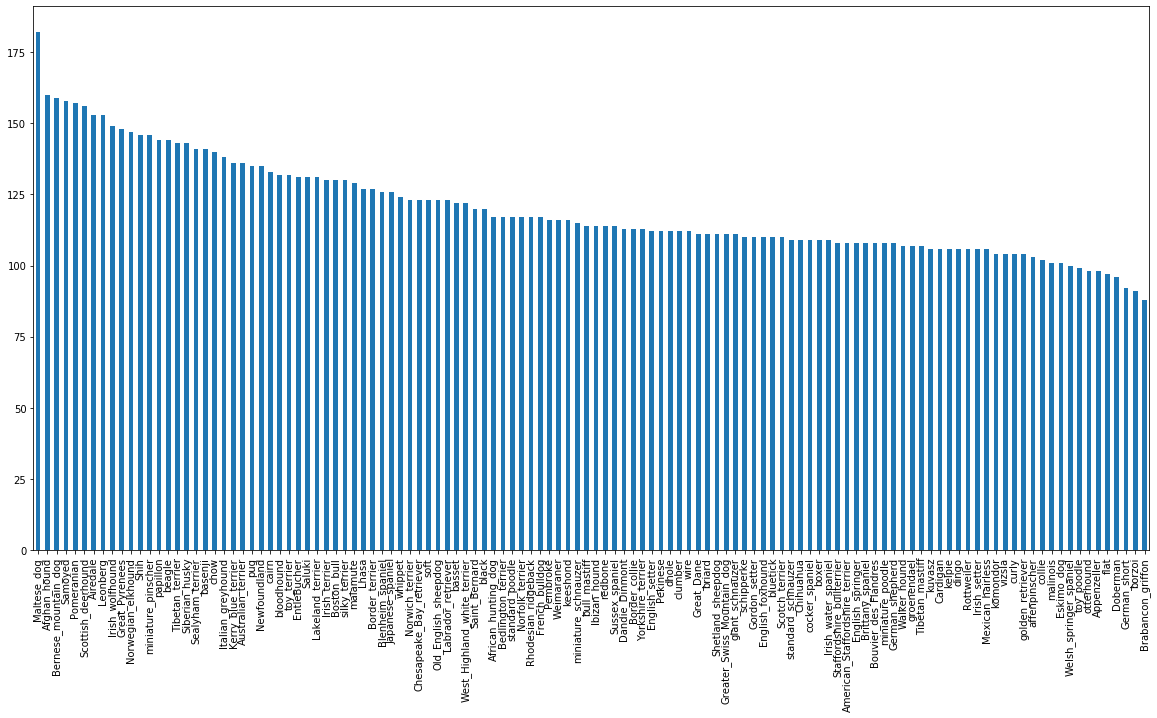

In [9]:
# How manu images are there of each breed?
labels_csv.Labels.value_counts().plot.bar(figsize=(20, 10))

In [10]:
labels_csv.Labels.value_counts().median()

114.0

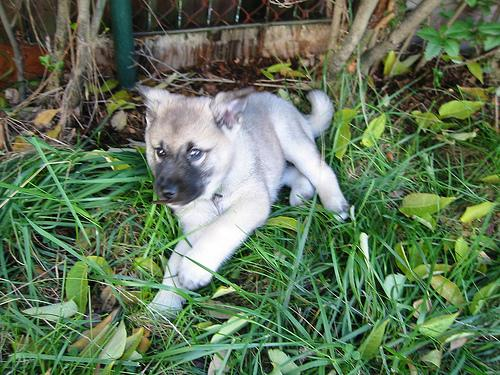

In [11]:
# Let's view an image
from IPython.display import Image
Image("train/2345_train.jpg")

# Getting image and their labels

In [12]:
filenames = [ f"train/{fname}" for fname in labels_csv["Filename"]]
filenames[:10]

['train/1_train.jpg',
 'train/2_train.jpg',
 'train/3_train.jpg',
 'train/4_train.jpg',
 'train/5_train.jpg',
 'train/6_train.jpg',
 'train/7_train.jpg',
 'train/8_train.jpg',
 'train/9_train.jpg',
 'train/10_train.jpg']

In [13]:
# Check whether number of filenames matches number of actual image files
if len(os.listdir( "train")) == len(filenames):
    print("Filenames match actual amount of files! Proceed.")
else:
    print(
        "Filenames do not match actual amount of files! Check target directory."
    )

Filenames match actual amount of files! Proceed.


Australian_terrier


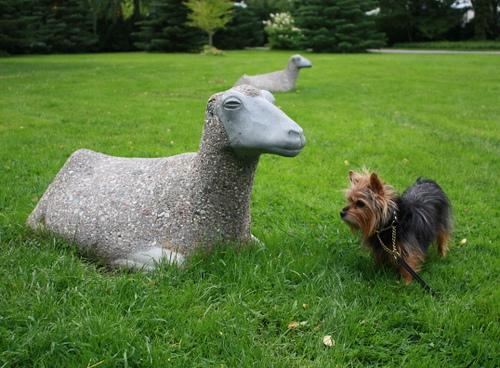

In [14]:
# One more check
print(labels_csv.Labels[500])
Image(filenames[500])

In [15]:
labels = labels_csv.Labels.values
labels

array(['chow', 'malamute', 'beagle', ..., 'Old_English_sheepdog',
       'African_hunting_dog', 'African_hunting_dog'], dtype=object)

In [16]:
len(labels)

14399

In [17]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print(
        "Number of labels does note matches number of filenames! Check data directory."
    )

Number of labels matches number of filenames!


In [18]:
# Find the uniques label values
unique_breeds = np.unique(labels)
print(len(unique_breeds))
print(unique_breeds)

120
['Afghan_hound' 'African_hunting_dog' 'Airedale'
 'American_Staffordshire_terrier' 'Appenzeller' 'Australian_terrier'
 'Bedlington_terrier' 'Bernese_mountain_dog' 'Blenheim_spaniel'
 'Border_collie' 'Border_terrier' 'Boston_bull' 'Bouvier_des_Flandres'
 'Brabancon_griffon' 'Brittany_spaniel' 'Cardigan'
 'Chesapeake_Bay_retriever' 'Chihuahua' 'Dandie_Dinmont' 'Doberman'
 'English_foxhound' 'English_setter' 'English_springer' 'EntleBucher'
 'Eskimo_dog' 'French_bulldog' 'German_shepherd' 'German_short'
 'Gordon_setter' 'Great_Dane' 'Great_Pyrenees'
 'Greater_Swiss_Mountain_dog' 'Ibizan_hound' 'Irish_setter'
 'Irish_terrier' 'Irish_water_spaniel' 'Irish_wolfhound'
 'Italian_greyhound' 'Japanese_spaniel' 'Kerry_blue_terrier'
 'Labrador_retriever' 'Lakeland_terrier' 'Leonberg' 'Lhasa' 'Maltese_dog'
 'Mexican_hairless' 'Newfoundland' 'Norfolk_terrier' 'Norwegian_elkhound'
 'Norwich_terrier' 'Old_English_sheepdog' 'Pekinese' 'Pembroke'
 'Pomeranian' 'Rhodesian_ridgeback' 'Rottweiler' 'Sai

In [19]:
# Turn a single label into an array of booleans (one-hot array)
print(labels[0])
labels[0] == unique_breeds

chow


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
# Turn every label into a boolean array
one_hot_labels = [label == unique_breeds for label in labels]
one_hot_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
# Setup X & y
X = filenames
y = one_hot_labels

In [22]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000

In [23]:
# Split our data into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [24]:
# Let's have a look on our training data
X_train[:2], y_train[:2]

(['train/30_train.jpg', 'train/536_train.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, 

In [25]:
IMG_SIZE=224
# Function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    """
  Takes an image filepath and turns it into a Tensor
  """
    # Read the image file
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 color channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the color channels values range from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to our desired values (224, 224)
    image = tf.image.resize(image, size=(img_size, img_size))
    # Return the modified image
    return image

In [26]:
# Simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
  Takes an image filepath name and the associated label, processes the image and return a tuple of (image, label)
  """
    image = process_image(image_path)
    return image, label

In [27]:
# Define the batch size. 32 is a good start
BATCH_SIZE = 32


# Function to turn data into batches
def create_data_batches(X,
                        y=None,
                        batch_size=BATCH_SIZE,
                        valid_data=False,
                        test_data=False):
    """
  Creates batches of data out of image (X) and label (y) pairs. Shuffles the data if it's validation data.
  Also accepts test data as input (no labels).
  """
    # If the data is test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X)))  # only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    # If the data is a valid dataset, we don't need to shuffle ir
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((
            tf.constant(X),  # filepaths
            tf.constant(y)))  # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X), tf.constant(y)))
        # Shuffling pathnames and labels bafore mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        # Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)

        return data_batch
# 


In [28]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [29]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [30]:
# Function for viewing images ina a data batch
def show_25_images(images, labels):
    """
  Displays a plot of a 25 of images and their labels from a data batch.
  """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    # Loop through the 25 * for displaying 25 images:
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")

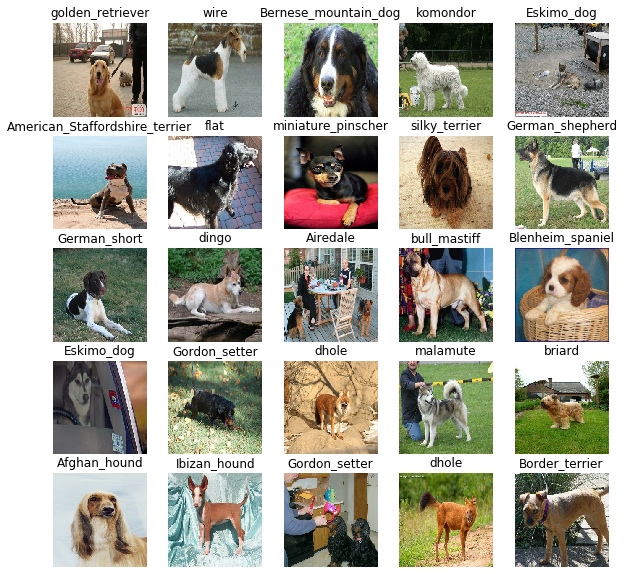

In [31]:
# Let's visualize our training set
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

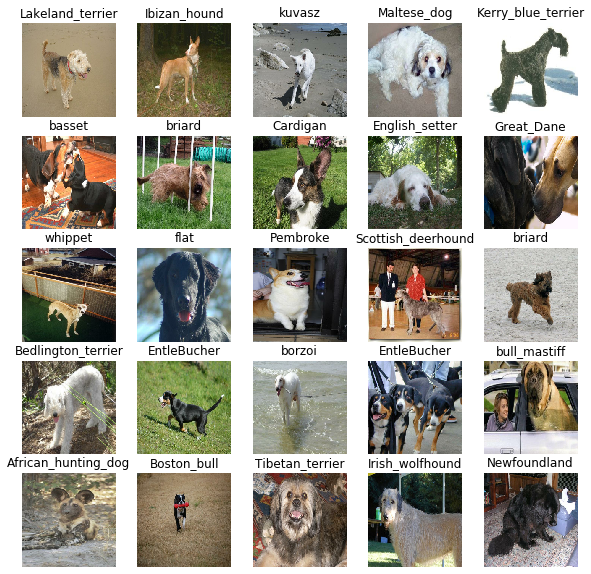

In [32]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [33]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,
               3]  # batch, hieght, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup the MobileNetV2 model URL from TensorFlow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [34]:
# Function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,
                 output_shape=OUTPUT_SHAPE,
                 model_url=MODEL_URL):
    print("Building model with:", model_url)

    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url),  # layer 1 (input layer)
        tf.keras.layers.Dense(units=output_shape,
                              activation="softmax")  # layer 2 (output layer)
    ])

    # Compile the model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

    # Build the model
    model.build(input_shape)

    return model


In [35]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [36]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [37]:
 #Function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join(
        LOGS_PATH,  # make it so the logs get tracked whenever we run an experiment
        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [38]:
# Create Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [39]:
NUM_EPOCHS = 100


# Function to train and return a trained model
def train_model(num_epochs=NUM_EPOCHS):
    """
  Trains a given model and return the trained version.
  """
    # Create a model
    model = create_model()

    # Create a new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])

    # Return the fitted model
    return model

In [44]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 13s 516ms/step - loss: 4.5148 - accuracy: 0.1200 - val_loss: 3.4482 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 12s 496ms/step - loss: 1.6027 - accuracy: 0.6750 - val_loss: 2.1487 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 12s 496ms/step - loss: 0.5567 - accuracy: 0.9275 - val_loss: 1.6341 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 13s 502ms/step - loss: 0.2439 - accuracy: 0.9887 - val_loss: 1.4835 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 13s 502ms/step - loss: 0.1413 - accuracy: 0.9987 - val_loss: 1.4059 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 13s 518ms/step - loss: 0.0965 - accuracy: 1.0000 - val_loss: 1.3594 - val_accuracy: 0.6300
Epoch 7/100
25/25 [========================

In [45]:
predictions = model.predict(val_data, verbose=1)
predictions


7/7 [==============================] - 2s 281ms/step


array([[5.94881494e-05, 4.12065892e-05, 1.54937916e-02, ...,
        8.78566862e-05, 2.25106021e-04, 6.40566051e-01],
       [3.25356996e-05, 3.39906946e-05, 2.19959529e-05, ...,
        1.35732225e-05, 3.99387674e-04, 5.81057902e-05],
       [6.73094255e-05, 2.97256543e-06, 4.67291975e-05, ...,
        6.83154951e-07, 3.14440927e-03, 3.17032239e-03],
       ...,
       [4.86177942e-06, 8.40242865e-06, 1.98899415e-05, ...,
        5.27937264e-05, 4.18398355e-04, 2.48922879e-04],
       [1.68903478e-06, 2.09479858e-05, 3.57653596e-04, ...,
        1.00650150e-05, 3.63520439e-06, 4.98861300e-05],
       [6.17791957e-05, 4.85651908e-05, 2.89279615e-06, ...,
        4.26615401e-07, 8.03669507e-04, 2.06467794e-05]], dtype=float32)

In [46]:
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[5.84282586e-03 6.58216362e-04 9.81468894e-03 9.04288725e-04
 2.78792740e-03 1.41055444e-02 5.90034237e-04 9.30660963e-03
 3.49546375e-04 1.86582864e-03 6.12284231e-04 4.78023052e-04
 5.99910622e-04 2.21485156e-04 7.80738192e-05 2.14786269e-04
 9.53788462e-04 2.76882871e-04 8.26518890e-03 3.49634443e-03
 3.57073592e-03 4.31282446e-04 4.15327866e-03 2.06218613e-03
 3.60389310e-03 2.02788979e-05 3.44046727e-02 6.32829324e-05
 3.19224055e-04 6.41908482e-05 1.45554845e-03 1.60675298e-03
 2.54025537e-04 1.08961808e-03 4.92978899e-04 6.25534216e-04
 8.23909009e-04 4.05048595e-05 3.34588141e-04 1.60485013e-06
 3.12380493e-03 5.64029033e-04 1.47074778e-02 2.10358121e-04
 5.75180922e-04 8.43694797e-05 8.70044169e-04 2.77645187e-03
 1.39679224e-03 3.51647468e-04 1.46105871e-01 4.88707738e-04
 5.80966414e-04 1.64045254e-03 3.04707846e-05 9.97675583e-04
 3.09214483e-05 3.00923944e-01 1.87008970e-06 4.95374661e-05
 7.08039792e-04 4.58223112e-05 4.34657792e-03 8.15323001e-05
 1.74926035e-02 5.757326

In [47]:
unique_breeds[57]

'Saluki'

In [48]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
  Turn an array of prediction probabilities into a label
  """
    return unique_breeds[np.argmax(prediction_probabilities)]

In [49]:
# Get a predicted label based on an array of prediction probabilities
get_pred_label(predictions[81])

'Australian_terrier'

In [50]:
# Function to unbatchify a batch dataset
def unbatchify(data):
    """
  Takes a batched dataset of (image, label) Tensors and return separate arrays
  of images and labels
  """
    images = []
    labels = []
    # Loop trhough unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(get_pred_label(label))

    return images, labels

In [51]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.5960598 , 0.55292255, 0.466648  ],
         [0.6027311 , 0.55959386, 0.47331935],
         [0.586365  , 0.54322773, 0.45695323],
         ...,
         [0.62168366, 0.582468  , 0.48442873],
         [0.62225145, 0.5634279 , 0.47323182],
         [0.62225145, 0.5634279 , 0.47323182]],
 
        [[0.56958234, 0.5264451 , 0.44017056],
         [0.57284874, 0.5297115 , 0.443437  ],
         [0.60366076, 0.5605235 , 0.47424904],
         ...,
         [0.61564606, 0.5764304 , 0.47839114],
         [0.63529414, 0.5764706 , 0.48627454],
         [0.63529414, 0.5764706 , 0.48627454]],
 
        [[0.5822001 , 0.53906286, 0.45278835],
         [0.58964103, 0.5465038 , 0.46022928],
         [0.5840715 , 0.5409343 , 0.4546598 ],
         ...,
         [0.61207986, 0.5728642 , 0.47482494],
         [0.62991947, 0.57109594, 0.4808999 ],
         [0.62991947, 0.57109594, 0.4808999 ]],
 
        ...,
 
        [[0.586346  , 0.5236009 , 0.4334048 ],
         [0.578752  , 0.5160069 , 0.42581

In [52]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
  View the prediction ground truth and image for sample n
  """
    pred_prob, true_label, image = prediction_probabilities[n], labels[
        n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # Plot the image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title depending if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Change plot title to be predicted, probability of prediction and truth label
    plt.title(f"{pred_label} {np.max(pred_prob)*100:2.0f}% {true_label}",
              color=color)


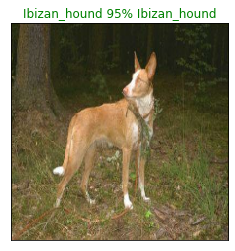

In [53]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [54]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
  Plot the top 10 highest prediction confidences along with the truth label for
  sample n
  """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction connfidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(
            top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

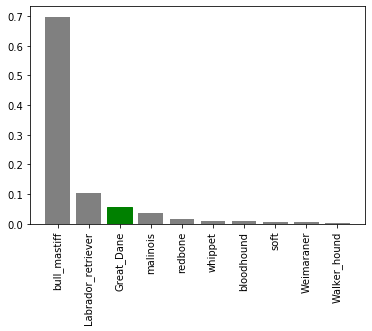

In [55]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=9)


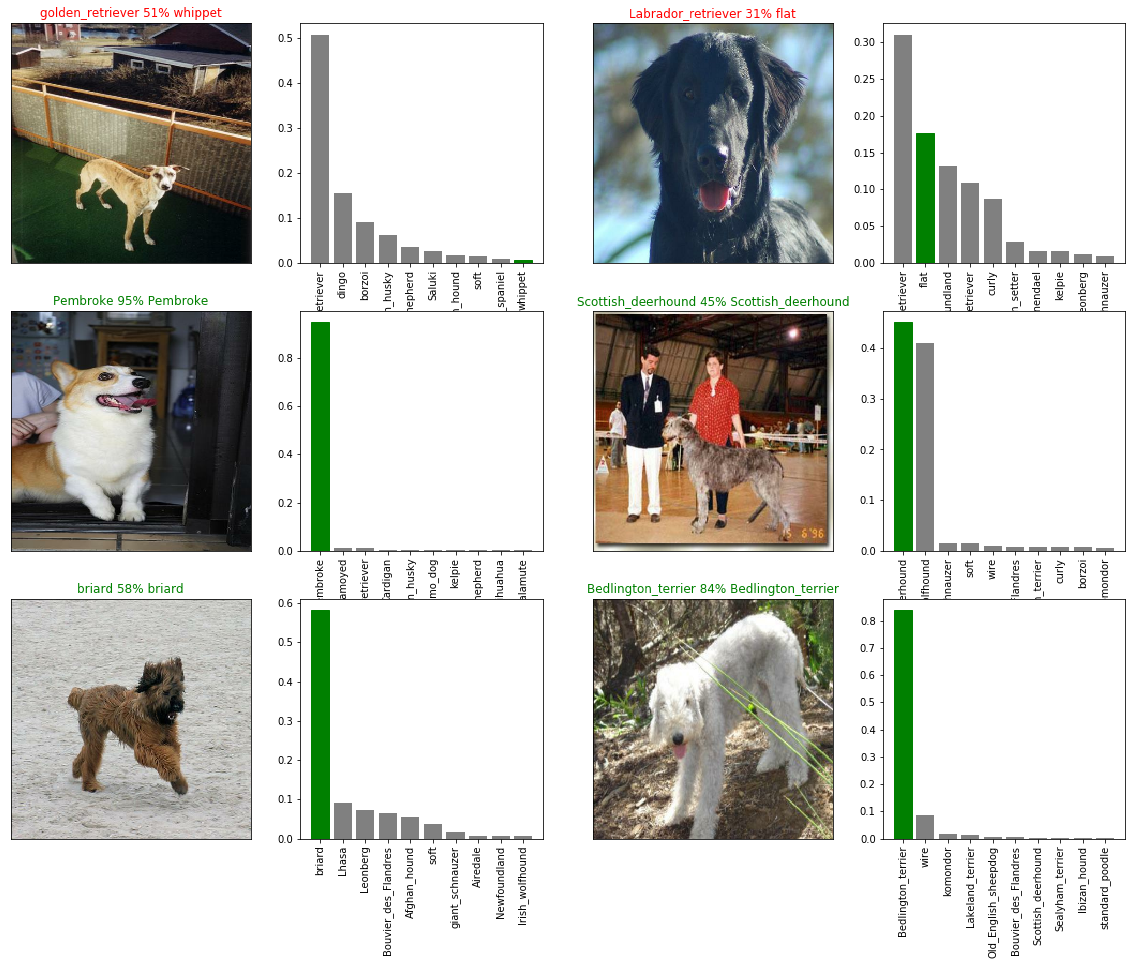

In [56]:
# Let's check out a few predictions and their different values
i_multiplier = 10
n_rows = 3
n_cols = 2
n_images = n_cols * n_rows
plt.figure(figsize=(10 * n_cols, 5 * n_rows))
for i in range(n_images):
    plt.subplot(n_rows, 2 * n_cols, 2 * i + 1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i + i_multiplier)
    plt.subplot(n_rows, 2 * n_cols, 2 * i + 2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i + i_multiplier)
plt.show()

In [57]:
def plot_conf_matrix(prediction_probabilities, labels):
    """
  Plot the confusion matrix of a trained model given its prediction
  probabilities and desired labels
  """
    # First, we get the corresponding labels of the predictions
    pred_labels = [
        get_pred_label(pred_probs) for pred_probs in prediction_probabilities
    ]

    # Check which breeds are present either in true and predicted labels
    breeds_in_true_labels = set(labels)
    breeds_in_pred_labels = set(pred_labels)
    breeds_in_set = [
        breed for breed in unique_breeds
        if breed in breeds_in_pred_labels and breed in breeds_in_true_labels
    ]

    # Computes the confusion matrix
    conf_mat = confusion_matrix(labels, pred_labels, labels=breeds_in_set)

    # Builds the confusion matrix dataframe (for the x and y ticks in the heatmap)
    conf_df = pd.DataFrame(conf_mat,
                           index=breeds_in_set,
                           columns=breeds_in_set)
    conf_df.dropna(inplace=True)

    # Now we plot the confusion matrix
    fig, ax = plt.subplots(figsize=(20, 20))
    conf_plot = sns.heatmap(conf_df, annot=True, cbar=False)

    plt.title("Confusion matrix")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

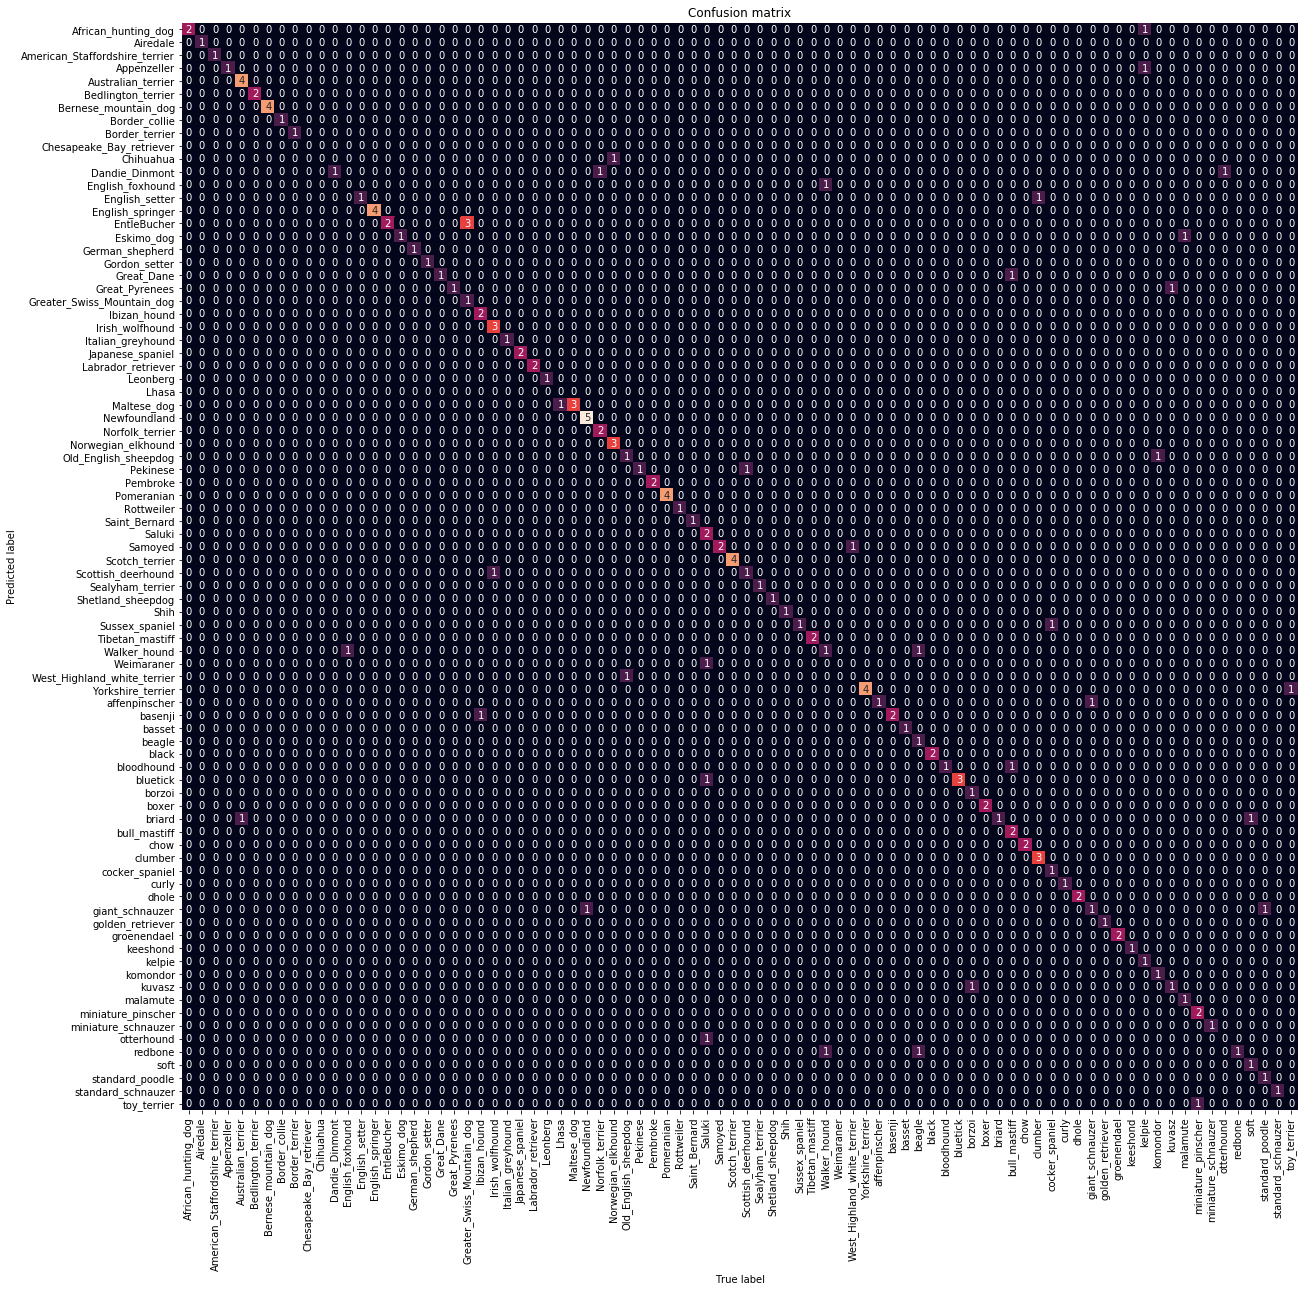

In [58]:
plot_conf_matrix(predictions, val_labels)

In [59]:
# Create a function to save a model
def save_model(model, suffix=None):
    """
  Save a given model in a model directory and appends a suffix (string)
  """
    # Create a model directory with current time
    modeldir = os.path.join(MODELS_PATH,
                            datetime.datetime.now().strftime("%Y%m%d_%H%M%S"))
    model_path = modeldir + "_" + suffix + ".h5"  # model save format
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path


In [60]:
# Create a function to load a trained model
def load_model(model_path):
    print(f"Loading saved model from: {model_path}...")
    model = tf.keras.models.load_model(
        model_path, custom_objects={"KerasLayer": hub.KerasLayer})
    return model

In [61]:
# Save our model trained on 1000 images
model_path = save_model(model, suffix="1000_images_mobilenetv2_Adam")

Saving model to: 20200911_211818_1000_images_mobilenetv2_Adam.h5...


In [62]:
# Load a trained model
loaded_1000_image_model = load_model(model_path)

Loading saved model from: 20200911_211818_1000_images_mobilenetv2_Adam.h5...


In [63]:
model.evaluate(val_data, )

7/7 [==============================] - 2s 312ms/step - loss: 1.2640 - accuracy: 0.6350


[1.264001727104187, 0.6349999904632568]

In [64]:
model.metrics_names

['loss', 'accuracy']

In [65]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [66]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [67]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [68]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", patience=3)

In [69]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
450/450 [==============================] - 203s 451ms/step - loss: 1.1325 - accuracy: 0.7110
Epoch 2/100
450/450 [==============================] - 201s 448ms/step - loss: 0.3819 - accuracy: 0.8831
Epoch 3/100
450/450 [==============================] - 211s 469ms/step - loss: 0.2431 - accuracy: 0.9266
Epoch 4/100
450/450 [==============================] - 210s 466ms/step - loss: 0.1629 - accuracy: 0.9560
Epoch 5/100
450/450 [==============================] - 225s 501ms/step - loss: 0.1170 - accuracy: 0.9703
Epoch 6/100
450/450 [==============================] - 235s 521ms/step - loss: 0.0852 - accuracy: 0.9798
Epoch 7/100
450/450 [==============================] - 238s 529ms/step - loss: 0.0688 - accuracy: 0.9857
Epoch 8/100
450/450 [==============================] - 235s 522ms/step - loss: 0.0540 - accuracy: 0.9897
Epoch 9/100
450/450 [==============================] - 241s 535ms/step - loss: 0.0453 - accuracy: 0.9918
Epoch 10/100
450/450 [==============================] -

In [70]:
full_model_path = save_model(full_model, suffix="full_image_set_mobilenetv2_Adam")

Saving model to: 20200911_223555_full_image_set_mobilenetv2_Adam.h5...


In [71]:
loaded_full_model = load_model(full_model_path)


Loading saved model from: 20200911_223555_full_image_set_mobilenetv2_Adam.h5...


In [72]:
# Load test image filenames
test_path = DATA_PATH + "test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['test/1000_test.jpg',
 'test/1001_test.jpg',
 'test/1002_test.jpg',
 'test/1003_test.jpg',
 'test/1004_test.jpg',
 'test/1005_test.jpg',
 'test/1006_test.jpg',
 'test/1007_test.jpg',
 'test/1008_test.jpg',
 'test/1009_test.jpg']

In [73]:
len(test_filenames)

6181

In [74]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [75]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [76]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

194/194 [==============================] - 180s 930ms/step


In [77]:
# Save predictions (NumPy arrary) to csv file (for access later)
np.savetxt(OUTPUT_PATH + "preds_array.csv", test_predictions, delimiter=",")

In [78]:
test_predictions = np.loadtxt(OUTPUT_PATH + "preds_array.csv", delimiter=",")

In [79]:
test_predictions

array([[2.91913107e-08, 1.71650638e-09, 1.36328598e-14, ...,
        6.98089928e-14, 1.32563927e-09, 4.79675691e-05],
       [1.82598749e-12, 1.01899950e-16, 3.61785255e-12, ...,
        2.42659828e-14, 3.03866295e-06, 2.78534509e-12],
       [2.02180293e-14, 5.89946190e-08, 2.44194894e-06, ...,
        3.55968510e-12, 1.67021317e-05, 6.79996207e-13],
       ...,
       [7.72820954e-07, 2.82678201e-07, 4.70064395e-12, ...,
        2.86572899e-08, 1.24252401e-04, 1.40161757e-10],
       [1.84498260e-15, 1.54547852e-09, 4.84256407e-13, ...,
        6.57296093e-11, 1.43868869e-12, 3.53736207e-11],
       [3.47288132e-09, 4.25219478e-11, 1.78683404e-05, ...,
        6.02118563e-11, 4.83462873e-06, 9.82226729e-01]])

In [80]:
test_predictions.shape

(6181, 120)

In [81]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df

,id,Afghan_hound,African_hunting_dog,Airedale,American_Staffordshire_terrier,Appenzeller,Australian_terrier,Bedlington_terrier,Bernese_mountain_dog,Blenheim_spaniel,...,schipperke,silky_terrier,soft,standard_poodle,standard_schnauzer,toy_poodle,toy_terrier,vizsla,whippet,wire


In [82]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df.head()

,id,Afghan_hound,African_hunting_dog,Airedale,American_Staffordshire_terrier,Appenzeller,Australian_terrier,Bedlington_terrier,Bernese_mountain_dog,Blenheim_spaniel,...,schipperke,silky_terrier,soft,standard_poodle,standard_schnauzer,toy_poodle,toy_terrier,vizsla,whippet,wire
0,1000_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,Afghan_hound,African_hunting_dog,Airedale,American_Staffordshire_terrier,Appenzeller,Australian_terrier,Bedlington_terrier,Bernese_mountain_dog,Blenheim_spaniel,...,schipperke,silky_terrier,soft,standard_poodle,standard_schnauzer,toy_poodle,toy_terrier,vizsla,whippet,wire
0,1000_test,2.91913e-08,1.71651e-09,1.36329e-14,9.94197e-11,6.14212e-09,2.54045e-08,1.49287e-07,7.51756e-11,2.48308e-10,...,1.55383e-06,5.02438e-13,1.85707e-11,7.80825e-07,1.42564e-08,2.65869e-09,2.04942e-09,6.9809e-14,1.32564e-09,4.79676e-05
1,1001_test,1.82599e-12,1.019e-16,3.61785e-12,8.89913e-07,8.19507e-07,6.60477e-12,3.58945e-13,8.89205e-15,1.26521e-12,...,1.16186e-12,3.7071e-13,4.87299e-09,2.59283e-11,7.61341e-15,1.6658e-14,1.48054e-14,2.4266e-14,3.03866e-06,2.78535e-12
2,1002_test,2.0218e-14,5.89946e-08,2.44195e-06,2.26459e-08,7.32102e-12,4.32534e-10,2.03761e-09,3.75618e-12,1.23041e-12,...,9.32887e-13,4.51452e-10,0.0151062,2.51417e-13,2.07544e-06,1.7207e-07,1.65925e-09,3.55969e-12,1.67021e-05,6.79996e-13
3,1003_test,3.94556e-12,8.64936e-15,5.91809e-16,1.20535e-16,2.1187e-13,7.53493e-11,1.56005e-14,1.80368e-14,1.5109e-17,...,2.0407e-14,6.90115e-14,1.68584e-15,2.98468e-15,2.28541e-13,3.39164e-15,4.76371e-13,9.08945e-14,1.11592e-14,2.32196e-15
4,1004_test,3.99777e-09,8.55607e-14,1.01944e-09,1.90097e-15,3.62263e-16,9.45467e-13,1.23064e-12,1.60605e-07,9.32402e-13,...,4.57011e-12,2.4336e-13,2.68208e-15,3.40352e-12,7.11872e-13,1.22119e-10,2.83629e-17,6.51527e-12,6.25183e-14,8.21844e-12


In [84]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv(OUTPUT_PATH +
                "output.csv",
                index=False)